In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [65]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


633

In [68]:
city_weather = pd.DataFrame(cities)
city_weather.head()

,0
0,wakiso
1,avarua
2,lavrentiya
3,mar del plata
4,cap malheureux


## Perform API Calls

In [69]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 


In [71]:
final_cities = []
latitude = []
temperature = []
humidity = []
cloudiness = []
wind = []


for city in cities:
    time.sleep(1)
    city_number = cities.index(city)
    try:
        query_url = url + "&q=" + city
        response = requests.get(query_url).json()        
        latitude.append(response['coord']['lat'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print(f'{city_number}: Retreiving data for {city}')
        print(f'      ------> Data successfully stored!')
        final_cities.append(response['name'])
    except:
        print(f'{city_number}: Retreiving data for {city}')
        print(f'ERROR: DATA UNAVAILABLE')
        pass
#         continue

0: Retreiving data for wakiso
      ------> Data successfully stored!
1: Retreiving data for avarua
      ------> Data successfully stored!
2: Retreiving data for lavrentiya
      ------> Data successfully stored!
3: Retreiving data for mar del plata
      ------> Data successfully stored!
4: Retreiving data for cap malheureux
      ------> Data successfully stored!
5: Retreiving data for jamestown
      ------> Data successfully stored!
6: Retreiving data for mataura
      ------> Data successfully stored!
7: Retreiving data for phalaborwa
      ------> Data successfully stored!
8: Retreiving data for barentsburg
ERROR: DATA UNAVAILABLE
9: Retreiving data for vaini
      ------> Data successfully stored!
10: Retreiving data for beloha
      ------> Data successfully stored!
11: Retreiving data for butaritari
      ------> Data successfully stored!
12: Retreiving data for rikitea
      ------> Data successfully stored!
13: Retreiving data for vostok
      ------> Data successfully stor

115: Retreiving data for necochea
      ------> Data successfully stored!
116: Retreiving data for mareeba
      ------> Data successfully stored!
117: Retreiving data for coulihaut
ERROR: DATA UNAVAILABLE
118: Retreiving data for ostrovnoy
      ------> Data successfully stored!
119: Retreiving data for fortuna
      ------> Data successfully stored!
120: Retreiving data for nikolskoye
      ------> Data successfully stored!
121: Retreiving data for yeppoon
      ------> Data successfully stored!
122: Retreiving data for mao
      ------> Data successfully stored!
123: Retreiving data for kalaiya
      ------> Data successfully stored!
124: Retreiving data for bengkulu
ERROR: DATA UNAVAILABLE
125: Retreiving data for ixtapa
      ------> Data successfully stored!
126: Retreiving data for minuri
      ------> Data successfully stored!
127: Retreiving data for dikson
      ------> Data successfully stored!
128: Retreiving data for burica
ERROR: DATA UNAVAILABLE
129: Retreiving data for 

228: Retreiving data for port-cartier
      ------> Data successfully stored!
229: Retreiving data for hobyo
      ------> Data successfully stored!
230: Retreiving data for axim
      ------> Data successfully stored!
231: Retreiving data for bilibino
      ------> Data successfully stored!
232: Retreiving data for port hardy
      ------> Data successfully stored!
233: Retreiving data for amangarh
      ------> Data successfully stored!
234: Retreiving data for erzin
      ------> Data successfully stored!
235: Retreiving data for kavieng
      ------> Data successfully stored!
236: Retreiving data for broome
      ------> Data successfully stored!
237: Retreiving data for belmonte
      ------> Data successfully stored!
238: Retreiving data for taoudenni
      ------> Data successfully stored!
239: Retreiving data for louisbourg
ERROR: DATA UNAVAILABLE
240: Retreiving data for provideniya
      ------> Data successfully stored!
241: Retreiving data for vao
      ------> Data success

340: Retreiving data for stephenville
      ------> Data successfully stored!
341: Retreiving data for chokurdakh
      ------> Data successfully stored!
342: Retreiving data for geeste
      ------> Data successfully stored!
343: Retreiving data for mount gambier
      ------> Data successfully stored!
344: Retreiving data for starkville
      ------> Data successfully stored!
345: Retreiving data for uwayl
ERROR: DATA UNAVAILABLE
346: Retreiving data for grand river south east
ERROR: DATA UNAVAILABLE
347: Retreiving data for inderborskiy
ERROR: DATA UNAVAILABLE
348: Retreiving data for berbera
ERROR: DATA UNAVAILABLE
349: Retreiving data for sinnamary
      ------> Data successfully stored!
350: Retreiving data for winchester
      ------> Data successfully stored!
351: Retreiving data for opuwo
      ------> Data successfully stored!
352: Retreiving data for bukachacha
      ------> Data successfully stored!
353: Retreiving data for mitchell
      ------> Data successfully stored!
3

453: Retreiving data for warqla
ERROR: DATA UNAVAILABLE
454: Retreiving data for lagos
      ------> Data successfully stored!
455: Retreiving data for labutta
ERROR: DATA UNAVAILABLE
456: Retreiving data for nakhon thai
      ------> Data successfully stored!
457: Retreiving data for goderich
      ------> Data successfully stored!
458: Retreiving data for novyye lyady
      ------> Data successfully stored!
459: Retreiving data for takhli
      ------> Data successfully stored!
460: Retreiving data for naze
      ------> Data successfully stored!
461: Retreiving data for palabuhanratu
ERROR: DATA UNAVAILABLE
462: Retreiving data for luanda
      ------> Data successfully stored!
463: Retreiving data for meadow lake
      ------> Data successfully stored!
464: Retreiving data for villa carlos paz
      ------> Data successfully stored!
465: Retreiving data for aklavik
      ------> Data successfully stored!
466: Retreiving data for tezu
      ------> Data successfully stored!
467: Ret

566: Retreiving data for muhororo
      ------> Data successfully stored!
567: Retreiving data for noyabrsk
      ------> Data successfully stored!
568: Retreiving data for grindavik
      ------> Data successfully stored!
569: Retreiving data for pauini
      ------> Data successfully stored!
570: Retreiving data for camopi
      ------> Data successfully stored!
571: Retreiving data for cutrofiano
      ------> Data successfully stored!
572: Retreiving data for loubomo
ERROR: DATA UNAVAILABLE
573: Retreiving data for jalu
      ------> Data successfully stored!
574: Retreiving data for rawson
      ------> Data successfully stored!
575: Retreiving data for alice springs
      ------> Data successfully stored!
576: Retreiving data for guican
      ------> Data successfully stored!
577: Retreiving data for guiyang
      ------> Data successfully stored!
578: Retreiving data for quesnel
      ------> Data successfully stored!
579: Retreiving data for bom jesus
      ------> Data success

In [75]:
len(final_cities)

572

In [76]:
weather_data = {
    "City": final_cities,
    "Latitude": latitude,
    "Temperature (F)": temperature,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind Speed (mph)": wind
}



In [77]:
city_weather = pd.DataFrame(weather_data)
city_weather.head()

,City,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Wakiso,0.40,58.64,88,48,2.84
1,Avarua,-21.21,75.20,60,40,18.34
2,Lavrentiya,65.58,46.67,91,0,8.66
3,Mar del Plata,-46.43,34.97,83,0,2.95
4,Cap Malheureux,-19.98,69.80,73,40,6.93


In [78]:
#What follows is an unsuccessful attempt to append variables directly into a dataframe named city_weather with an index of "cities" and blank columns for Temp, Humidity, etc
#I changed my method to gather separate lists first, then compile a dataframe, since I could not identify the Key Error

#for index, row in city_weather.iterrows():
#    time.sleep(2)
#    query_url = url + "&q=" + city
#    weather_response = requests.get(query_url)
#    weather_json = weather_response.json()
#    try:
#        temperature = city_weather["main"]["temp"]
#        humidity = city_weather["main"]["humidity"]
#        cloudiness = city_weather["clouds"]["all"]
#        wind_speed = city_weather["wind"]["speed"]
#        latitude = city_weather["coord"]["lat"]
        
#        city_weather.set_value(index, "Temperature", temperature)
#        city_weather.set_value(index,"Humidity", humidity)
#        city_weather.set_value(index,"Cloudiness", cloudiness)
#        city_weather.set_value(index,"Wind Speed", wind_speed)
#    except:
#        print("Weather data error skipped")
        

In [80]:
city_weather.to_csv("city-weather.csv", index=False, header=True)

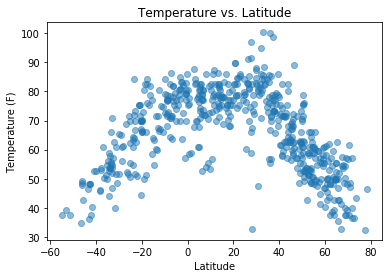

In [84]:
plt.scatter(city_weather["Latitude"],city_weather["Temperature (F)"], alpha = 0.5)

plt.title("Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")



plt.savefig("Temp.png")
plt.show()

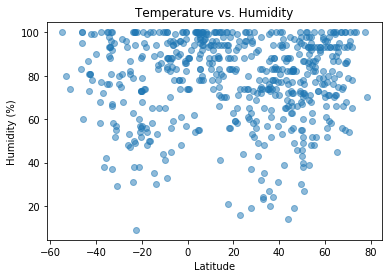

In [85]:
plt.scatter(city_weather["Latitude"],city_weather["Humidity (%)"], alpha = 0.5)

plt.title("Temperature vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")



plt.savefig("Humid.png")
plt.show()

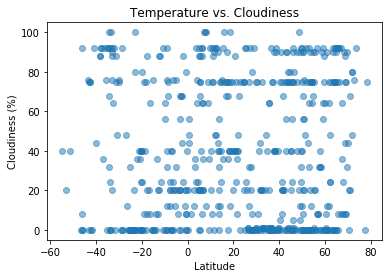

In [86]:
plt.scatter(city_weather["Latitude"],city_weather["Cloudiness (%)"], alpha = 0.5)

plt.title("Temperature vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")



plt.savefig("Cloud.png")
plt.show()

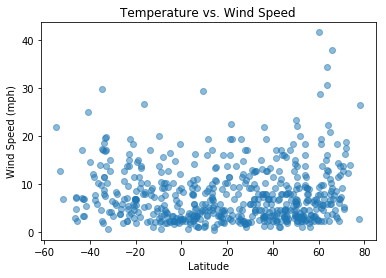

In [87]:
plt.scatter(city_weather["Latitude"],city_weather["Wind Speed (mph)"], alpha = 0.5)

plt.title("Temperature vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")



plt.savefig("Wind.png")
plt.show()